# Tujuan
## 1. Perusahaan hendak mengenal lebih baik pelanggannya
## 2. Perusahaan dapat membuat strategi pemasaran yang tepat & efisien
## 3. Teknikal -> Mengelompokan pelanggan berdasarkan kesamaan karakter

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from pathlib import Path
from IPython.display import display

In [20]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
# df.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science in Marketing - Customer Segmentation with Python\File Dokumentasi\File CSV\customer_segments.csv", index=None, header=True)
# df.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science in Marketing - Customer Segmentation with Python\File Dokumentasi\File Excel\customer_segments.xlsx", index=None, header=True)
display(df.head())

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [3]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


None

,Umur,NilaiBelanjaSetahun
count,50.000000,5.000000e+01
mean,37.500000,7.069875e+06
std,14.673661,2.590619e+06
min,14.000000,2.722700e+06
25%,25.000000,5.257530e+06
50%,35.000000,5.980077e+06
75%,49.750000,9.739615e+06
max,64.000000,1.088451e+07


Kesimpulan
Setelah melakukan pemanggilan data dan melihat informasi data yang kamu miliki, kamu akhirnya mengetahui bahwa:

1. Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
2. Tidak ada nilai null pada data
3. Dua kolom memiliki tipe data numeric dan lima data bertipe string

Tips:
Dalam setiap project machine learning, kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut. Dengan melakukan hal ini, kita bisa memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang kita gunakan. Informasi ini nantinya akan menentukan proses apa yang perlu kita lakukan selanjutnya.

## Eksplorasi data Numerik

<Figure size 432x288 with 0 Axes>

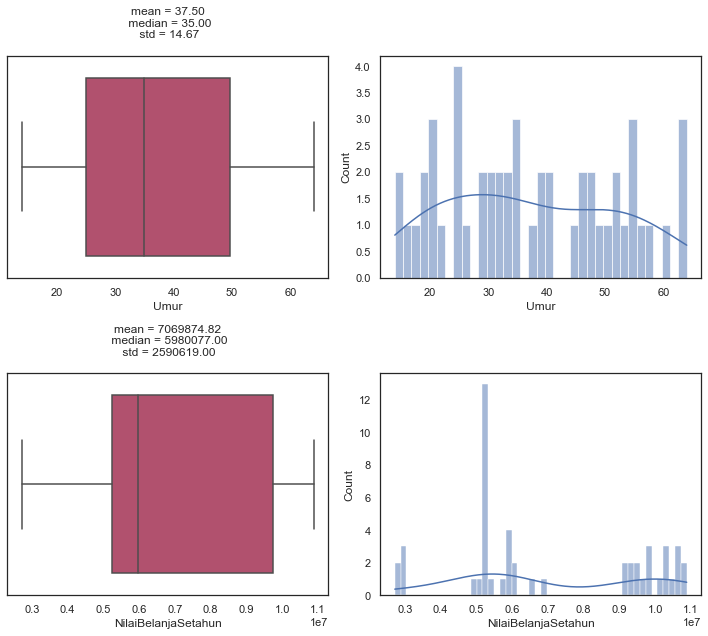

In [4]:
sns.set(style="white")
plt.clf()

def observasi_num(features):
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        sns.boxplot(x = df[kol], palette="flare", ax = axs[i][0])
        sns.histplot(data = df[kol],bins=df[kol].nunique(), ax = axs[i][1], kde=True)
        axs[i][0].set_title("mean = %.2f\n median = %.2f\n std = %.2f\n" %(df[kol].mean(), df[kol].median(), df[kol].std()))
    # plt.setp(axs)
    plt.tight_layout()
    plt.show()

kolom_numerik = ["Umur", "NilaiBelanjaSetahun"]
observasi_num(kolom_numerik)

## Eksplorasi Data Kategorikal

<Figure size 432x288 with 0 Axes>

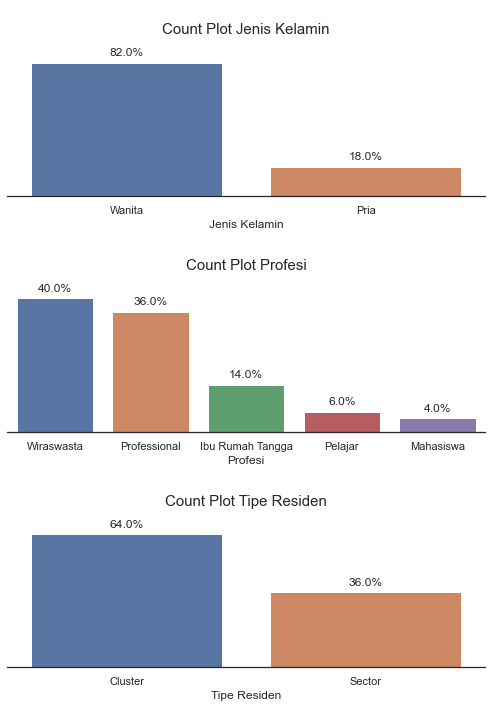

In [5]:
sns.set(style="white")
plt.clf()

kolom_kategorikal = ["Jenis Kelamin", "Profesi", "Tipe Residen"]
fig, axs = plt.subplots(3, 1, figsize=(7, 10))
# print(df.shape[0])

for i, kol in enumerate(kolom_kategorikal):
    sns.countplot(x = df[kol], order=df[kol].value_counts().index, ax = axs[i])
    axs[i].set_title("\nCount Plot %s\n"%(kol), fontsize=15)

    for p in axs[i].patches:
        # print(p)
        total = df.shape[0]
        axs[i].annotate(
                        "{:.1%}".format(p.get_height()/total),
                        xy = (p.get_x() + p.get_width()/2, p.get_height()),
                        ha = "center",
                        va = "center",
                        xytext = (0, 10),
                        textcoords = "offset points"
                       )
    sns.despine(right=True, top=True, left=True)
    axs[i].axes.yaxis.set_visible(False)
    plt.tight_layout()

plt.show()


Kesimpulan
Dari hasil eksplorasi data tersebut kamu dapat mendapatkan informasi:

1. Rata-rata dari umur pelanggan adalah 37.5 tahun
2. Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82
3. Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)
4. Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)
5. Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sektor

Tips:
Kita dapat mengenal data kita lebih jauh lagi pada tahapan eksplorasi data ini. Proses eksplorasi data bisa berupa univariate maupun multivariate data eksplorasi. Eksplorasi Data Univariate melihat karakteristik tiap-tiap feature, misalnya dengan melihat statistik deskriptif, membuat histogram, kdeplot, countplot maupun boxplot. Sedangkan untuk Eksplorasi Data Multivariate, kita melihat hubungan tiap variabel dengan variabel lainnya, misal kan dengan membuat korelasi matrix, melihat predictive power, cross tabulasi, dan lainnya.

## Standarisasi Kolom Numerik

In [6]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ["Umur", "NilaiBelanjaSetahun"]

print("Statistik sebelum Standarisasi")
display(df[kolom_numerik].describe().round())

# Standarisasi
std = StandardScaler()
df_std = std.fit_transform(df[kolom_numerik])
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns )
display(df_std.head(10))

print("Statistik setelah Standarisasi")
display(df_std.describe().round())

Statistik sebelum Standarisasi


,Umur,NilaiBelanjaSetahun
count,50.0,50.0
mean,38.0,7069875.0
std,15.0,2590619.0
min,14.0,2722700.0
25%,25.0,5257530.0
50%,35.0,5980077.0
75%,50.0,9739615.0
max,64.0,10884508.0


,Umur,NilaiBelanjaSetahun
0,1.411245,0.946763
1,-1.617768,-1.695081
2,0.722833,-0.695414
3,1.067039,-0.727361
4,0.240944,1.382421
5,-0.929356,-0.723055
6,1.824292,1.079078
7,0.998198,-0.719925
8,-0.585150,-0.419818
9,-0.309785,-0.706714


Statistik setelah Standarisasi


,Umur,NilaiBelanjaSetahun
count,50.0,50.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,1.0


In [7]:
from sklearn.preprocessing import MinMaxScaler

kolom_numerik = ["Umur", "NilaiBelanjaSetahun"]

print("Statistik sebelum Standarisasi")
display(df[kolom_numerik].describe().round())

# Standarisasi
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df[kolom_numerik])
df_minmax = pd.DataFrame(data=df_minmax, index=df.index, columns=df[kolom_numerik].columns )
display(df_minmax.head(10))

print("Statistik setelah Standarisasi")
display(df_minmax.describe().round())

Statistik sebelum Standarisasi


,Umur,NilaiBelanjaSetahun
count,50.0,50.0
mean,38.0,7069875.0
std,15.0,2590619.0
min,14.0,2722700.0
25%,25.0,5257530.0
50%,35.0,5980077.0
75%,50.0,9739615.0
max,64.0,10884508.0


,Umur,NilaiBelanjaSetahun
0,0.88,0.830113
1,0.00,0.000000
2,0.68,0.314113
3,0.78,0.304075
4,0.54,0.967005
5,0.20,0.305428
6,1.00,0.871689
7,0.76,0.306411
8,0.30,0.400710
9,0.38,0.310562


Statistik setelah Standarisasi


,Umur,NilaiBelanjaSetahun
count,50.0,50.0
mean,0.0,1.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,1.0,1.0
max,1.0,1.0


## Konversi Kategorikal Data dengan Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder

kolom_kategorikal = ["Jenis Kelamin", "Profesi", "Tipe Residen"]
df_encode = df[kolom_kategorikal].copy()

label_encoder = LabelEncoder()
for col in kolom_kategorikal:
    df_encode[col] = label_encoder.fit_transform(df_encode[col])
    display(list(label_encoder.classes_))
    display(sorted(df_encode[col].unique()))

display(df_encode.head())

['Pria', 'Wanita']

[0, 1]

['Ibu Rumah Tangga', 'Mahasiswa', 'Pelajar', 'Professional', 'Wiraswasta']

[0, 1, 2, 3, 4]

['Cluster', 'Sector']

[0, 1]

,Jenis Kelamin,Profesi,Tipe Residen
0,0,4,1
1,1,2,0
2,0,3,0
3,0,3,0
4,1,4,0


## Merge DataFrame

In [10]:
df_model = df_encode.merge(df_std, left_index=True, right_index=True, how="left")
display(df_model.head(10))

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421
5,1,3,0,-0.929356,-0.723055
6,0,4,1,1.824292,1.079078
7,0,3,0,0.998198,-0.719925
8,1,3,1,-0.585150,-0.419818
9,0,3,0,-0.309785,-0.706714


Kesimpulan
Sampai di sini, kamu sudah menggunakan kemampuan kamu dalam menyiapkan library dan data. Kemudian melakukan data eksplorasi dan pemrosesan data hingga mendapatkan data yang siap digunakan untuk permodelan. 

Tips:

Pada aplikasi di industri, proses pemrosesan data ini termasuk yang paling banyak menghabiskan waktu bagi data scientist. Selain yang sudah kita lakukan masih banyak teknik lain yang perlu dilakukan. Sebagai contoh kadang kita perlu melakukan data imputation ketika ada null data di dataset yang akan kita gunakan. Selain itu kadang kita juga perlu melakukan transformasi variabel, misalnya ketika kita memiliki distribusi data yang condong ke salah satu sisi (skew data). Tambahan contoh lainnya yaitu terkadang kita perlu menangani pencilan yang ada di data kita.

## Mencari jumlah cluster yang optimal

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421
5,1,3,0,-0.929356,-0.723055
6,0,4,1,1.824292,1.079078
7,0,3,0,0.998198,-0.719925
8,1,3,1,-0.585150,-0.419818
9,0,3,0,-0.309785,-0.706714


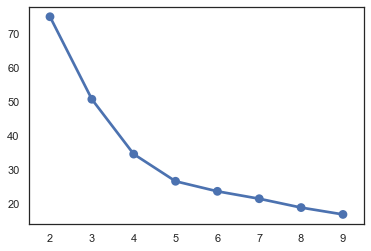

In [31]:
df_model = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/df-customer-segmentation.csv")
# df_model.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science in Marketing - Customer Segmentation with Python\File Dokumentasi\File CSV\df-customer-segmentation.csv", index=None, header=True)
# df_model.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Data Science in Marketing - Customer Segmentation with Python\File Dokumentasi\File Excel\df-customer-segmentation.xlsx", index=None, header=True)
display(df_model.head(10))

cost = {}
for k in range(2, 10):
    kproto = KPrototypes(n_clusters=k, random_state=75)
    kproto.fit_predict(df_model, categorical=[0, 1, 2])
    cost[k] = kproto.cost_
    
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

## Membuat Model

In [34]:
kproto = KPrototypes(n_clusters=5, random_state=75)
kproto = kproto.fit(df_model, categorical=[0, 1, 2])
pickle.dump(kproto, open("cluster.pkl", "wb"))

## Menggunakan Model

In [39]:
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt", sep="\t")
display(df.head(10))

clusters = kproto.predict(df_model, categorical=[0, 1, 2])
print("Segmen Pelanggan")
display(clusters)

df_final = df.copy()
df_final["cluster"] = clusters

display(df_final.head(10))

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206
5,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541
6,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260
7,CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569
8,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218
9,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5257448


Segmen Pelanggan


array([3, 1, 2, 2, 0, 4, 3, 2, 4, 4, 2, 2, 3, 3, 0, 4, 4, 2, 0, 1, 0, 2,
       4, 0, 0, 2, 0, 4, 2, 2, 1, 3, 1, 0, 4, 0, 4, 3, 4, 1, 4, 0, 4, 0,
       4, 0, 2, 3, 4, 3], dtype=uint16)

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,3
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,1
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0
5,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,4
6,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,3
7,CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569,2
8,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,4
9,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5257448,4


In [43]:
for i in range(0, df_final["cluster"].nunique()):
    print("Pelanggan Cluster - {}".format(i))
    display(df_final[df_final["cluster"] == i])

Pelanggan Cluster - 0


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0
14,CUST-015,Shirley Ratuwati,Wanita,20,Wiraswasta,Cluster,10365668,0
18,CUST-019,Mega Pranoto,Wanita,32,Wiraswasta,Cluster,10884508,0
20,CUST-021,Lestari Fabianto,Wanita,38,Wiraswasta,Cluster,9222070,0
23,CUST-024,Putri Ginting,Wanita,39,Wiraswasta,Cluster,10259572,0
24,CUST-025,Julia Setiawan,Wanita,29,Wiraswasta,Sector,10721998,0
26,CUST-027,Grace Mulyati,Wanita,35,Wiraswasta,Cluster,9114159,0
33,CUST-034,Deasy Arisandi,Wanita,21,Wiraswasta,Sector,9759822,0
35,CUST-036,Ni Made Suasti,Wanita,30,Wiraswasta,Cluster,9678994,0
41,CUST-042,Yuliana Wati,Wanita,26,Wiraswasta,Cluster,9880607,0


Pelanggan Cluster - 1


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,1
19,CUST-020,Irene Novianto,Wanita,16,Pelajar,Sector,2896845,1
30,CUST-031,Eviana Handry,Wanita,19,Mahasiswa,Cluster,3042773,1
32,CUST-033,Cecilia Kusnadi,Wanita,19,Mahasiswa,Cluster,3047926,1
39,CUST-040,Irene Darmawan,Wanita,14,Pelajar,Sector,2861855,1


Pelanggan Cluster - 2


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2
7,CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569,2
10,CUST-011,Maria Suryawan,Wanita,50,Professional,Sector,5987367,2
11,CUST-012,Erliana Widjaja,Wanita,49,Professional,Sector,5941914,2
17,CUST-018,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5340690,2
21,CUST-022,Novita Purba,Wanita,52,Professional,Cluster,5298157,2
25,CUST-026,Christine Winarto,Wanita,55,Professional,Cluster,5269392,2
28,CUST-029,Tia Hartanti,Wanita,56,Professional,Cluster,5271845,2
29,CUST-030,Rosita Saragih,Wanita,46,Ibu Rumah Tangga,Sector,5020976,2


Pelanggan Cluster - 3


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,3
6,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,3
12,CUST-013,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9333168,3
13,CUST-014,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9471615,3
31,CUST-032,Chintya Winarni,Wanita,47,Wiraswasta,Sector,10663179,3
37,CUST-038,Agatha Salim,Wanita,46,Wiraswasta,Sector,10477127,3
47,CUST-048,Maria Hutagalung,Wanita,45,Wiraswasta,Sector,10390732,3
49,CUST-050,Lianna Nugraha,Wanita,55,Wiraswasta,Sector,10569316,3


Pelanggan Cluster - 4


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
5,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,4
8,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,4
9,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5257448,4
15,CUST-016,Bambang Rudi,Pria,35,Professional,Cluster,5262521,4
16,CUST-017,Yuni Sari,Wanita,32,Ibu Rumah Tangga,Cluster,5677762,4
22,CUST-023,Denny Amiruddin,Pria,34,Professional,Cluster,5239290,4
27,CUST-028,Adeline Huang,Wanita,40,Ibu Rumah Tangga,Cluster,6631680,4
34,CUST-035,Ida Ayu,Wanita,39,Professional,Sector,5962575,4
36,CUST-037,Felicia Tandiono,Wanita,25,Professional,Sector,5972787,4
38,CUST-039,Gina Hidayat,Wanita,20,Professional,Cluster,5257775,4


## Visualisasi Hasil Clustering data numerik

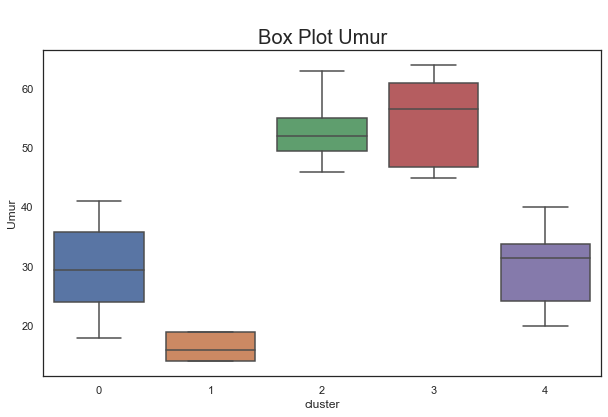

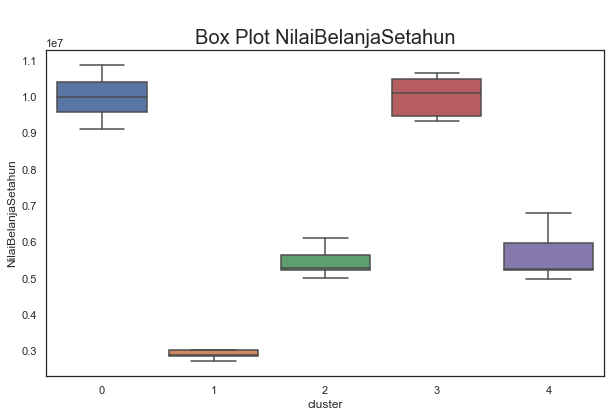

In [47]:
kolom_numerik = ["Umur", "NilaiBelanjaSetahun"]
for i in kolom_numerik:
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x = "cluster", y = i, data = df_final)
    plt.title("\nBox Plot {}".format(i), fontsize=20)
    plt.show()

## Visualisasi hasil clustering data categorical

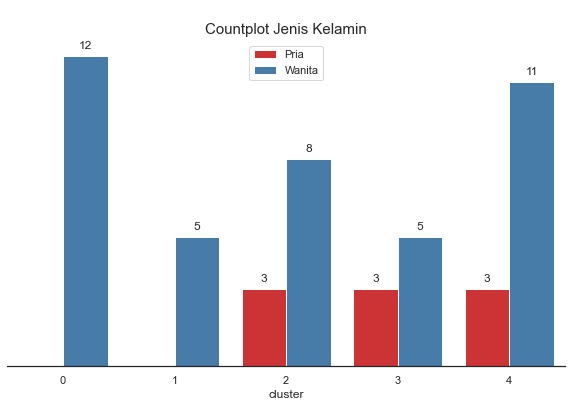

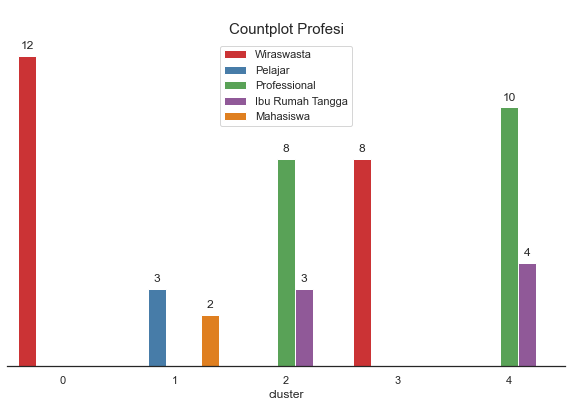

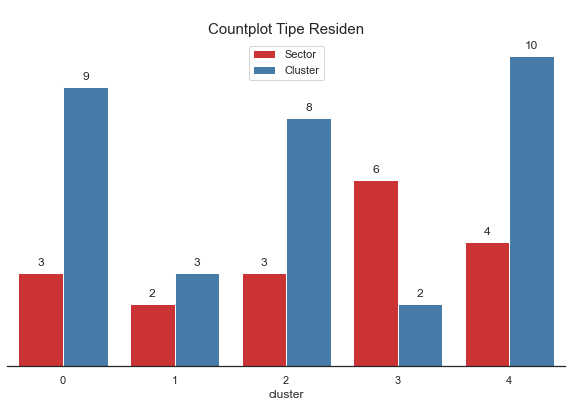

In [56]:
kolom_kategorikal = ["Jenis Kelamin", "Profesi", "Tipe Residen"]

for i in kolom_kategorikal:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data = df_final, x = "cluster", hue = i, palette="Set1")
    ax.legend(loc="upper center")
    plt.title("\nCountplot {}".format(i), fontsize = 15)

    for p in ax.patches:
        ax.annotate(
                    format(p.get_height(), ".0f"),
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha="center",
                    va="center",
                    xytext = (0, 10),
                    textcoords = "offset points"
                   )

    sns.despine(left=True, top=True, right=True)
    ax.axes.yaxis.set_visible(False)
    plt.show()

## Menamakan Cluster

In [59]:
df_final["segmen"] = df_final["cluster"].map({
    0 : "Diamond Young Enterpreneur Member",
    1 : "Silver Students Member",
    2 : "Gold Senior Professional Member",
    3 : "Diamond Senior Enterpreneur Member",
    4 : "Gold Young Professional Member"
})

display(df_final.head())
display(df_final.info())

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,3,Diamond Senior Enterpreneur Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,1,Silver Students Member
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,2,Gold Senior Professional Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,2,Gold Senior Professional Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0,Diamond Young Enterpreneur Member


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB


None

## Mempersiapkan Data Baru

In [61]:
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}] 

new_df = pd.DataFrame(data)
display(new_df)

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000


## Membuat Fungsi Data Pemrosesan

In [68]:
# ['Pria', 'Wanita']
# [0, 1]
# ['Ibu Rumah Tangga', 'Mahasiswa', 'Pelajar', 'Professional', 'Wiraswasta']
# [0, 1, 2, 3, 4]
# ['Cluster', 'Sector']
# [0, 1]
def data_preprocess(data):
    # Kolom Kategorikal
    kolom_kategorikal = ["Jenis Kelamin", "Profesi", "Tipe Residen"]
    df_encode = data[kolom_kategorikal].copy()
    df_encode["Jenis Kelamin"] = df_encode["Jenis Kelamin"].map({
        "Pria" : 0,
        "Wanita" : 1
    })
    df_encode["Profesi"] = df_encode["Profesi"].map({
        "Ibu Rumah Tangga" : 0,
        "Mahasiswa" : 1,
        "Pelajar" : 2,
        "Professional" : 3,
        "Wiraswasta" : 4
    })
    df_encode["Tipe Residen"] = df_encode["Tipe Residen"].map({
        "Cluster" : 0,
        "Sector" : 1
    })

    # Kolom Numerikal
    kolom_numerikal = ["Umur", "NilaiBelanjaSetahun"]
    df_std = data[kolom_numerikal].copy()
    df_std["Umur"] = (df_std["Umur"] - 37.5)/14.7
    df_std["NilaiBelanjaSetahun"] = (df_std["NilaiBelanjaSetahun"] - 7069874.8)/2590619.0

    # Membuat dataframe baru
    df_model = df_encode.merge(df_std, left_index=True, right_index=True, how="left")

    return df_model

In [71]:
new_df_model = data_preprocess(new_df)
display(new_df_model)

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,0,0.510204,0.447818


## Memanggil Model & Melakukan Prediksi

In [73]:
def modelling(data):
    # Memanggil Model
    kproto = pickle.load(open("cluster.pkl","rb"))
    # Melakukan Prediksi
    cluster = kproto.predict(data, categorical=[0, 1, 2])
    return cluster

clusters = modelling(new_df_model)
display(clusters)

array([3], dtype=uint16)

## Menamakan Segmen

In [75]:
def menamakan_segmen(data, clusters):
    # Menggabungkan data & clusters
    final_df = data.copy()
    final_df["cluster"] = clusters

    # Menamakan segmen
    final_df["segmen"] = final_df["cluster"].map({
        0 : "Diamond Young Enterpreneur Member",
        1 : "Silver Students Member",
        2 : "Gold Senior Professional Member",
        3 : "Diamond Senior Enterpreneur Member",
        4 : "Gold Young Professional Member"
    })

    return final_df

new_final_df = menamakan_segmen(new_df, clusters)
display(new_final_df)

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000,3,Diamond Senior Enterpreneur Member


Penutup
Kamu berhasilkan menyelesaikan tugas pertama kamu sebagai data scientist di tempat baru kamu. Dalam perjalanannya kamu belajar untuk:

1. Menyiapkan library dan data yang akan digunakan
2. Melakukan eksplorasi data numerik dan kategorikal menggunakan boxplot, distplot dan juga countplot
3. Melakukan pemrosesan awal data dengan merubah kolom text menjadi numerik dan melakukan standardisasi kolom numerik
4. Membuat dan mengoptimalkan model menggunakan algoritma k-prototype
5. Menggunakan model untuk memprediksi data-data baru.

Kamu pun saat ini siap untuk mendapatkan tugas-tugas selanjutnya dengan tantangan yang berbeda dan berkontribusi lebih banyak lagi.
Di industri tugas data scientist bisa sangat bervariasi, sehingga kamu perlu selalu meningkatkan kemampuan diri dengan belajar dan menyelesaikan beberapa studi kasus.